In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier#KNeighborsRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt


In [2]:
# load data
churnData = pd.DataFrame(pd.read_csv('Data\DATA_Customer-Churn.csv'))
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [3]:
# get insight of data
df_describe = pd.DataFrame({"% NaN" : round(churnData.isna().sum()/len(churnData),4)*100, "% 0.0" : round(churnData[churnData == 0].count(axis=0)/len(churnData.index)* 100,2)}).transpose()
df_describe.append(churnData.describe(include='all')).transpose()

,% NaN,% 0.0,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,0.0,0.0,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,0.0,83.79,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,0.0,0.0,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,0.0,0.0,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,0.0,0.16,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,0.0,0.0,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,0.0,0.0,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,0.0,0.0,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceProtection,0.0,0.0,7043,3,No,3095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TechSupport,0.0,0.0,7043,3,No,3473,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# strip space and make it numeric.
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'].replace(" ",""))

In [5]:
# replace 0 with ffill
column_list = ['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']
churnData[['tenure','MonthlyCharges','TotalCharges']] = churnData[['tenure','MonthlyCharges','TotalCharges']].replace(to_replace=0, method='pad').fillna(method='pad')
X = churnData[column_list]

In [6]:
y = churnData['Churn'].replace('No',0).replace('Yes',1)

In [7]:
X, X_1_test, y, y_1_test = train_test_split(X,y, test_size=.10,random_state=123)

In [8]:
def model_classifier(X,y,model,transformer=None):
    from sklearn.model_selection import train_test_split


    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30,random_state=123)
    if transformer != None:
        if transformer == 'PowerTransformer':
            from sklearn.preprocessing import PowerTransformer
            trans = PowerTransformer()
        elif transformer == 'StandardScaler':
            from sklearn.preprocessing import StandardScaler
            trans = StandardScaler()
        trans.fit(X_train)

        X_train = trans.transform(X_train)
        X_test  = trans.transform(X_test)
        
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_train_pred),
                                         precision_score(y_train, y_train_pred),
                                         recall_score(y_train, y_train_pred)],
                               'Test': [accuracy_score(y_test, y_test_pred),
                                        precision_score(y_test, y_test_pred),
                                        recall_score(y_test, y_test_pred)]})

    display(performance_log)

    # print("Confusion matrix for the train set")
    # print(confusion_matrix(y_train,y_train_pred))
    # #(model,X_train,y_train, values_format = 'd')
    # ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
    # plt.show()

    # print()
    # print()

    # print("Confusion matrix for the test set")
    # print(confusion_matrix(y_test, y_test_pred))
    # #plot_confusion_matrix(model,X_test,y_test, values_format = 'd')
    # ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
    # plt.show()
    return model, X_train, y_train


    apply K-fold cross validation on your models before and check the model score. Note: So far we have not balanced the data.


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [10]:
log = LogisticRegression()
df = DecisionTreeClassifier(max_depth=12)
knn = KNeighborsClassifier(n_neighbors=25)

model_names = ['Regression Tree', 'Linear Regression', 'KNN']
scores_compare = {}
i=0

for model in [log,df,knn]:
    print(model)
    out = model_classifier(X,y,model)
    scores=cross_val_score(out[0],out[1],out[2], cv=10)
    scores_compare[model_names[i]] = scores.mean()
    i = i+1
    print(model,"has an %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    print('----------------------------------------------------------------------------------------')
    print('----------------------------------------------------------------------------------------')
print(scores_compare)


LogisticRegression()


,Error_metric,Train,Test
0,Accuracy,0.789450,0.802839
1,Precision,0.647482,0.673981
2,Recall,0.457627,0.442387


LogisticRegression() has an 0.79 accuracy with a standard deviation of 0.02
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=12)


C:\ProgramData\Anaconda3\envs\DA_Env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Error_metric,Train,Test
0,Accuracy,0.892696,0.747634
1,Precision,0.839768,0.506522
2,Recall,0.737288,0.479424


DecisionTreeClassifier(max_depth=12) has an 0.74 accuracy with a standard deviation of 0.01
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=25)


,Error_metric,Train,Test
0,Accuracy,0.795987,0.782860
1,Precision,0.697274,0.618123
2,Recall,0.411864,0.393004


KNeighborsClassifier(n_neighbors=25) has an 0.78 accuracy with a standard deviation of 0.02
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
{'Regression Tree': 0.7869664246639415, 'Linear Regression': 0.7418812153010799, 'KNN': 0.782003335163606}



Managing imbalance in the dataset



    Check for the imbalance.


In [11]:
y.value_counts()

0    4672
1    1666
Name: Churn, dtype: int64

In [12]:
len(y[y==1])/len(y)

0.2628589460397602

    Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.


In [13]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [14]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    4672
1    4672
Name: Churn, dtype: int64

    Each time fit the model and see how the accuracy of the model is.


In [15]:
X1 = X.copy()
y1 = y.copy() 
y.value_counts()

0    4672
1    1666
Name: Churn, dtype: int64

In [16]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
for i in range(4):
    X1, y1 = tl.fit_resample(X1, y1)
    
y1.value_counts()

C:\ProgramData\Anaconda3\envs\DA_Env\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


0    3964
1    1666
Name: Churn, dtype: int64

In [17]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

C:\ProgramData\Anaconda3\envs\DA_Env\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


0    4169
1    1666
Name: Churn, dtype: int64

In [18]:
log = LogisticRegression()
df = DecisionTreeClassifier(max_depth=4)
knn = KNeighborsClassifier(n_neighbors=25)

model_names = ['Regression Tree', 'Linear Regression', 'KNN']
scores_compare = {}
i=0

for model in [log,df,knn]:
    print(model)
    out = model_classifier(X1,y1,model)
    scores=cross_val_score(out[0],out[1],out[2], cv=50)
    scores_compare[model_names[i]] = scores.mean()
    i = i+1
    print(model,"has an %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    print('----------------------------------------------------------------------------------------')
    print('----------------------------------------------------------------------------------------')
print(scores_compare)

LogisticRegression()


,Error_metric,Train,Test
0,Accuracy,0.789394,0.791001
1,Precision,0.678534,0.674877
2,Recall,0.553373,0.553535


LogisticRegression() has an 0.79 accuracy with a standard deviation of 0.04
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=4)


,Error_metric,Train,Test
0,Accuracy,0.804364,0.787448
1,Precision,0.744499,0.703593
2,Recall,0.520068,0.474747


DecisionTreeClassifier(max_depth=4) has an 0.80 accuracy with a standard deviation of 0.04
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=25)


,Error_metric,Train,Test
0,Accuracy,0.801319,0.790409
1,Precision,0.735437,0.715596
2,Recall,0.517506,0.472727


KNeighborsClassifier(n_neighbors=25) has an 0.79 accuracy with a standard deviation of 0.04
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
{'Regression Tree': 0.7901590392729634, 'Linear Regression': 0.7982667964946445, 'KNN': 0.7863063940279131}


### Gridsearch with Random Forest
0.9 of original Data is used. 0.1 saved for ultimate test (especially after upsampling)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20,random_state=123)

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [50, 100, 150],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf' : [1, 2, 8],
    'max_depth' : [None, 2, 4, 8],
    'max_features': ['sqrt','auto']
#    'max_samples' : ['None', 0.5]
    }
clf = RandomForestClassifier(random_state=100)

In [21]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,refit=True,verbose=2)

In [22]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 8],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1, 2, 8],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, verbose=2)

In [23]:
grid_search.best_params_ #To check the best set of parameter's returned

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 150}

## using the above results 

In [24]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=0, max_depth=10, n_estimators=50)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))
clf.fit(X_train,y_train)

0.7856015779092702


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=0)

,Error_metric,Train_cv10,Test,Test_1
0,Accuracy,0.785602,0.783912,0.774468
1,Precision,0.631098,0.595918,0.659420
2,Recall,0.461710,0.454829,0.448276


Confusion matrix for the test set
[[848  99]
 [175 146]]


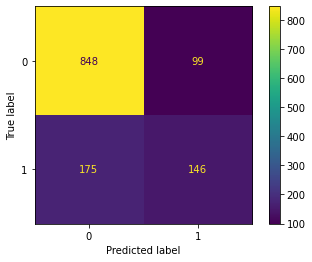

In [25]:
y_train_pred = cross_val_predict(clf,X_train,y_train,cv=10)
y_test_pred = clf.predict(X_test)
y_1_test_pred = clf.predict(X_1_test)
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                            'Train_cv10': [accuracy_score(y_train, y_train_pred),
                                        precision_score(y_train, y_train_pred),
                                        recall_score(y_train, y_train_pred)],
                            'Test': [accuracy_score(y_test, y_test_pred),
                                    precision_score(y_test, y_test_pred),
                                    recall_score(y_test, y_test_pred)],
                            'Test_1': [accuracy_score(y_1_test, y_1_test_pred),
                                    precision_score(y_1_test, y_1_test_pred),
                                    recall_score(y_1_test, y_1_test_pred)]
                            })

display(performance_log)

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_test_pred))
#plot_confusion_matrix(model,X_test,y_test, values_format = 'd')
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
plt.show()

In [26]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(criterion = 'entropy', max_depth = 8, random_state=0, max_features='sqrt', 
                             min_samples_leaf=2, min_samples_split=2, n_estimators=50)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))
clf.fit(X_train,y_train)

0.7877712031558186


RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=50, random_state=0)

,Error_metric,Train_cv10,Test,Test_1
0,Accuracy,0.787771,0.786278,0.780142
1,Precision,0.639668,0.602459,0.666667
2,Recall,0.457993,0.457944,0.472906


Confusion matrix for the test set
[[850  97]
 [174 147]]


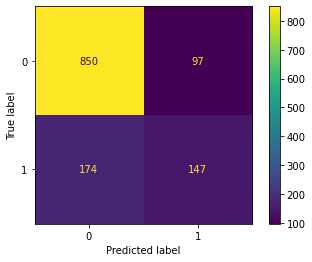

In [27]:
y_train_pred = cross_val_predict(clf,X_train,y_train,cv=10)
y_test_pred = clf.predict(X_test)
y_1_test_pred = clf.predict(X_1_test)
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                            'Train_cv10': [accuracy_score(y_train, y_train_pred),
                                        precision_score(y_train, y_train_pred),
                                        recall_score(y_train, y_train_pred)],
                            'Test': [accuracy_score(y_test, y_test_pred),
                                    precision_score(y_test, y_test_pred),
                                    recall_score(y_test, y_test_pred)],
                            'Test_1': [accuracy_score(y_1_test, y_1_test_pred),
                                    precision_score(y_1_test, y_1_test_pred),
                                    recall_score(y_1_test, y_1_test_pred)]
                            })

display(performance_log)

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_test_pred))
#plot_confusion_matrix(model,X_test,y_test, values_format = 'd')
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
plt.show()

## Grid with upsampled X

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [29]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    4672
1    4672
Name: Churn, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=.20,random_state=123)

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [50, 100, 150],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf' : [ 2, 8],
    'max_depth' : [None, 4, 8],
    'max_features': ['sqrt','auto']
#    'max_samples' : ['None', 0.5]
    }
clf = RandomForestClassifier(random_state=100)

In [32]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,refit=True,verbose=3)

In [33]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 4, 8],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [2, 8],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, verbose=3)

In [34]:
grid_search.best_params_ #To check the best set of parameter's returned

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150}

## using the above results 

In [35]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(criterion = 'gini', random_state=0, max_depth=None, n_estimators=100, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 8)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))
clf.fit(X_train,y_train)

0.7769865558490647


RandomForestClassifier(max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=8, random_state=0)

,Error_metric,Train_cv10,Train,Test,Test_unsampled
0,Accuracy,0.776990,0.923478,0.776351,0.721986
1,Precision,0.764357,0.913775,0.774691,0.513725
2,Recall,0.797849,0.934409,0.790966,0.645320


Confusion matrix for the test set
[[698 219]
 [199 753]]


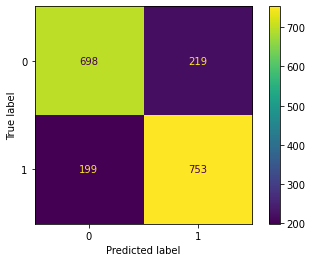

In [36]:
y_train_pred_cv10 = cross_val_predict(clf,X_train,y_train,cv=10)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_1_test_pred = clf.predict(X_1_test)
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                            'Train_cv10': [accuracy_score(y_train, y_train_pred_cv10),
                                        precision_score(y_train, y_train_pred_cv10),
                                        recall_score(y_train, y_train_pred_cv10)],
                             'Train': [accuracy_score(y_train, y_train_pred),
                                precision_score(y_train, y_train_pred),
                                recall_score(y_train, y_train_pred)],
                            'Test': [accuracy_score(y_test, y_test_pred),
                                    precision_score(y_test, y_test_pred),
                                    recall_score(y_test, y_test_pred)],
                            'Test_unsampled': [accuracy_score(y_1_test, y_1_test_pred),
                                    precision_score(y_1_test, y_1_test_pred),
                                    recall_score(y_1_test, y_1_test_pred)]
                            })

display(performance_log)

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_test_pred))
#plot_confusion_matrix(model,X_test,y_test, values_format = 'd')
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
plt.show()